## Importing Electric Vehicle Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("EV.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'EV.csv'

## Data Pre-processing

In [201]:
data['Total Electric Vehicle'] = data['Total Electric Vehicle'].str.replace(',' , '')
data['Total Non-Electric Vehicle'] = data['Total Non-Electric Vehicle'].str.replace(',' , '')
data['Total'] = data['Total'].str.replace("," , "")
print(len(data))
data.head()

34


,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available
0,Andaman & Nicobar Island,162,146945,147107,0,10,0
1,Arunachal Pradesh,20,252965,252985,0,0,4
2,Assam,64766,4677053,4741819,0,20,19
3,Bihar,83335,10407078,10490413,0,37,26
4,Chandigarh,2812,746881,749693,48,70,1


In [202]:
data['Total Electric Vehicle'] = data['Total Electric Vehicle'].astype(int)
data['Total Non-Electric Vehicle'] = data['Total Non-Electric Vehicle'].astype(int)
data['Total'] = data['Total'].astype(int)
data.dtypes

State Name                                         object
Total Electric Vehicle                              int32
Total Non-Electric Vehicle                          int32
Total                                               int32
Charging Stations                                   int64
No. of EV chargers sanctioned                       int64
No of RO's where EV Charging Facility available     int64
dtype: object

In [203]:
State = pd.get_dummies(data['State Name'],drop_first=True)
data = pd.concat([data,State], axis = 1)

data.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Andhra Pradesh,Arunachal Pradesh,Assam,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,UT of DNH and DD,Uttar Pradesh,Uttarakhand,West Bengal
0,Andaman & Nicobar Island,162,146945,147107,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arunachal Pradesh,20,252965,252985,0,0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Assam,64766,4677053,4741819,0,20,19,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Bihar,83335,10407078,10490413,0,37,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chandigarh,2812,746881,749693,48,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   State Name                                       34 non-null     object
 1   Total Electric Vehicle                           34 non-null     int32 
 2   Total Non-Electric Vehicle                       34 non-null     int32 
 3   Total                                            34 non-null     int32 
 4   Charging Stations                                34 non-null     int64 
 5   No. of EV chargers sanctioned                    34 non-null     int64 
 6   No of RO's where EV Charging Facility available  34 non-null     int64 
 7   Andhra Pradesh                                   34 non-null     uint8 
 8   Arunachal Pradesh                                34 non-null     uint8 
 9   Assam                                        

In [205]:
data.describe()

,Total Electric Vehicle,Total Non-Electric Vehicle,Total,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,UT of DNH and DD,Uttar Pradesh,Uttarakhand,West Bengal
count,34.000000,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,40066.647059,8.632410e+06,8.672476e+06,12.764706,69.882353,41.470588,0.029412,0.029412,0.029412,0.029412,...,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412
std,66518.102854,1.059540e+07,1.064771e+07,23.936860,96.509621,49.115347,0.171499,0.171499,0.171499,0.171499,...,0.171499,0.171499,0.171499,0.171499,0.171499,0.171499,0.171499,0.171499,0.171499,0.171499
min,20.000000,3.830200e+04,3.832800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,733.250000,5.369995e+05,5.397545e+05,0.000000,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15807.500000,3.994547e+06,4.042434e+06,0.000000,22.500000,20.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47893.250000,1.371638e+07,1.375666e+07,14.250000,121.500000,69.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,337180.000000,4.009249e+07,4.042967e+07,94.000000,317.000000,174.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
# data.drop(columns =['State Name','Total Electric Vehicle' , 'Total'],axis = 1)

## Exploratory Analysis

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

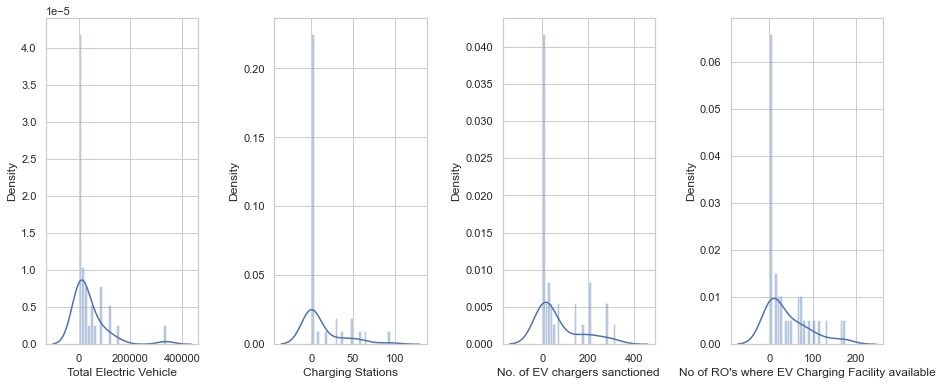

In [207]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Total Electric Vehicle','Charging Stations','No. of EV chargers sanctioned', "No of RO's where EV Charging Facility available"]:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x] , bins=30)
plt.show()

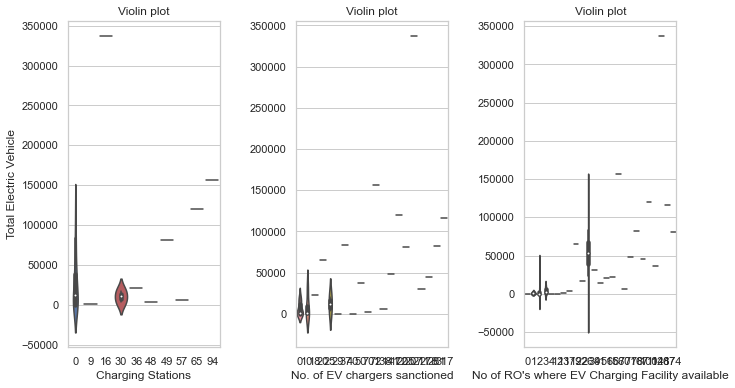

In [208]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Charging Stations','No. of EV chargers sanctioned', "No of RO's where EV Charging Facility available"]:
    n += 1
    plt.subplot(1,4,n)
    sns.set(style= "whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols , y='Total Electric Vehicle',data= data)
    plt.ylabel("Total Electric Vehicle" if n==1 else "")
    plt.title("Violin plot")
plt.show()

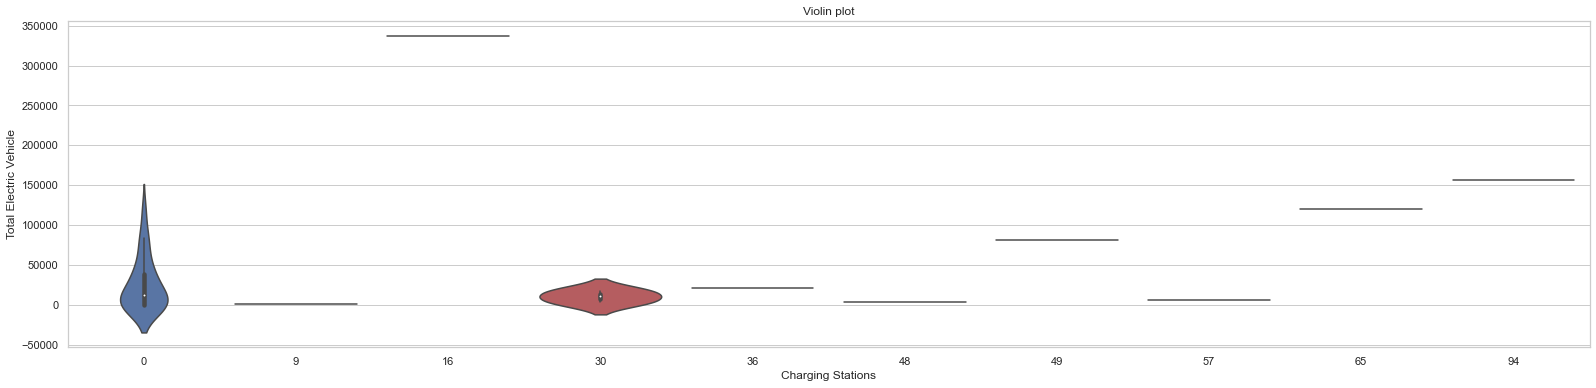

In [209]:
plt.figure(1,figsize=(150,6))

plt.subplot(1,4,1)
sns.set(style= "whitegrid")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.violinplot(x="Charging Stations", y='Total Electric Vehicle',data= data)
plt.ylabel("Total Electric Vehicle" )
plt.title("Violin plot")
plt.show()

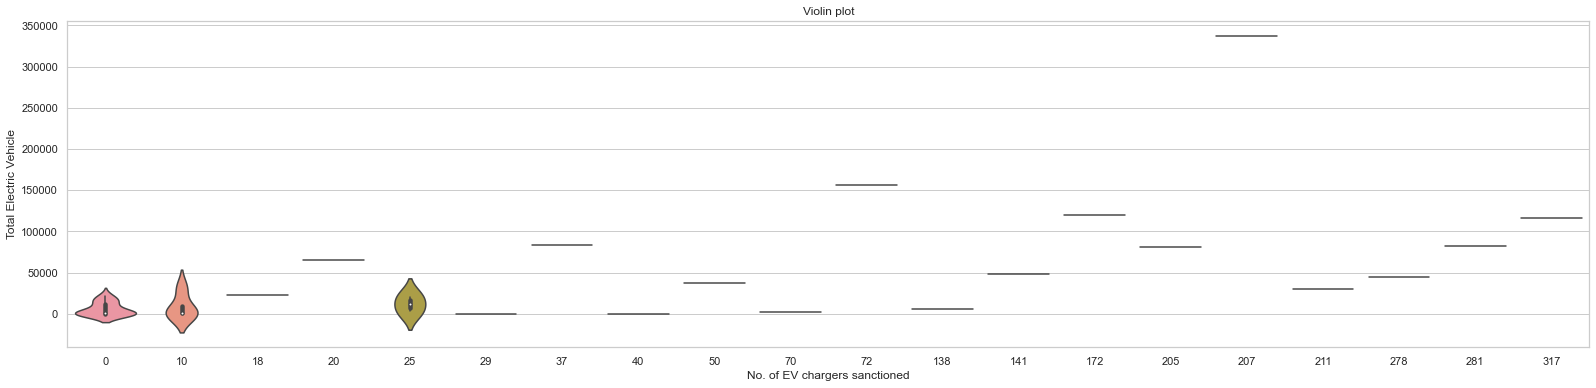

In [210]:
plt.figure(1,figsize=(150,6))

plt.subplot(1,4,1)
sns.set(style= "whitegrid")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.violinplot(x="No. of EV chargers sanctioned", y='Total Electric Vehicle',data= data)
plt.ylabel("Total Electric Vehicle")
plt.title("Violin plot")
plt.show()

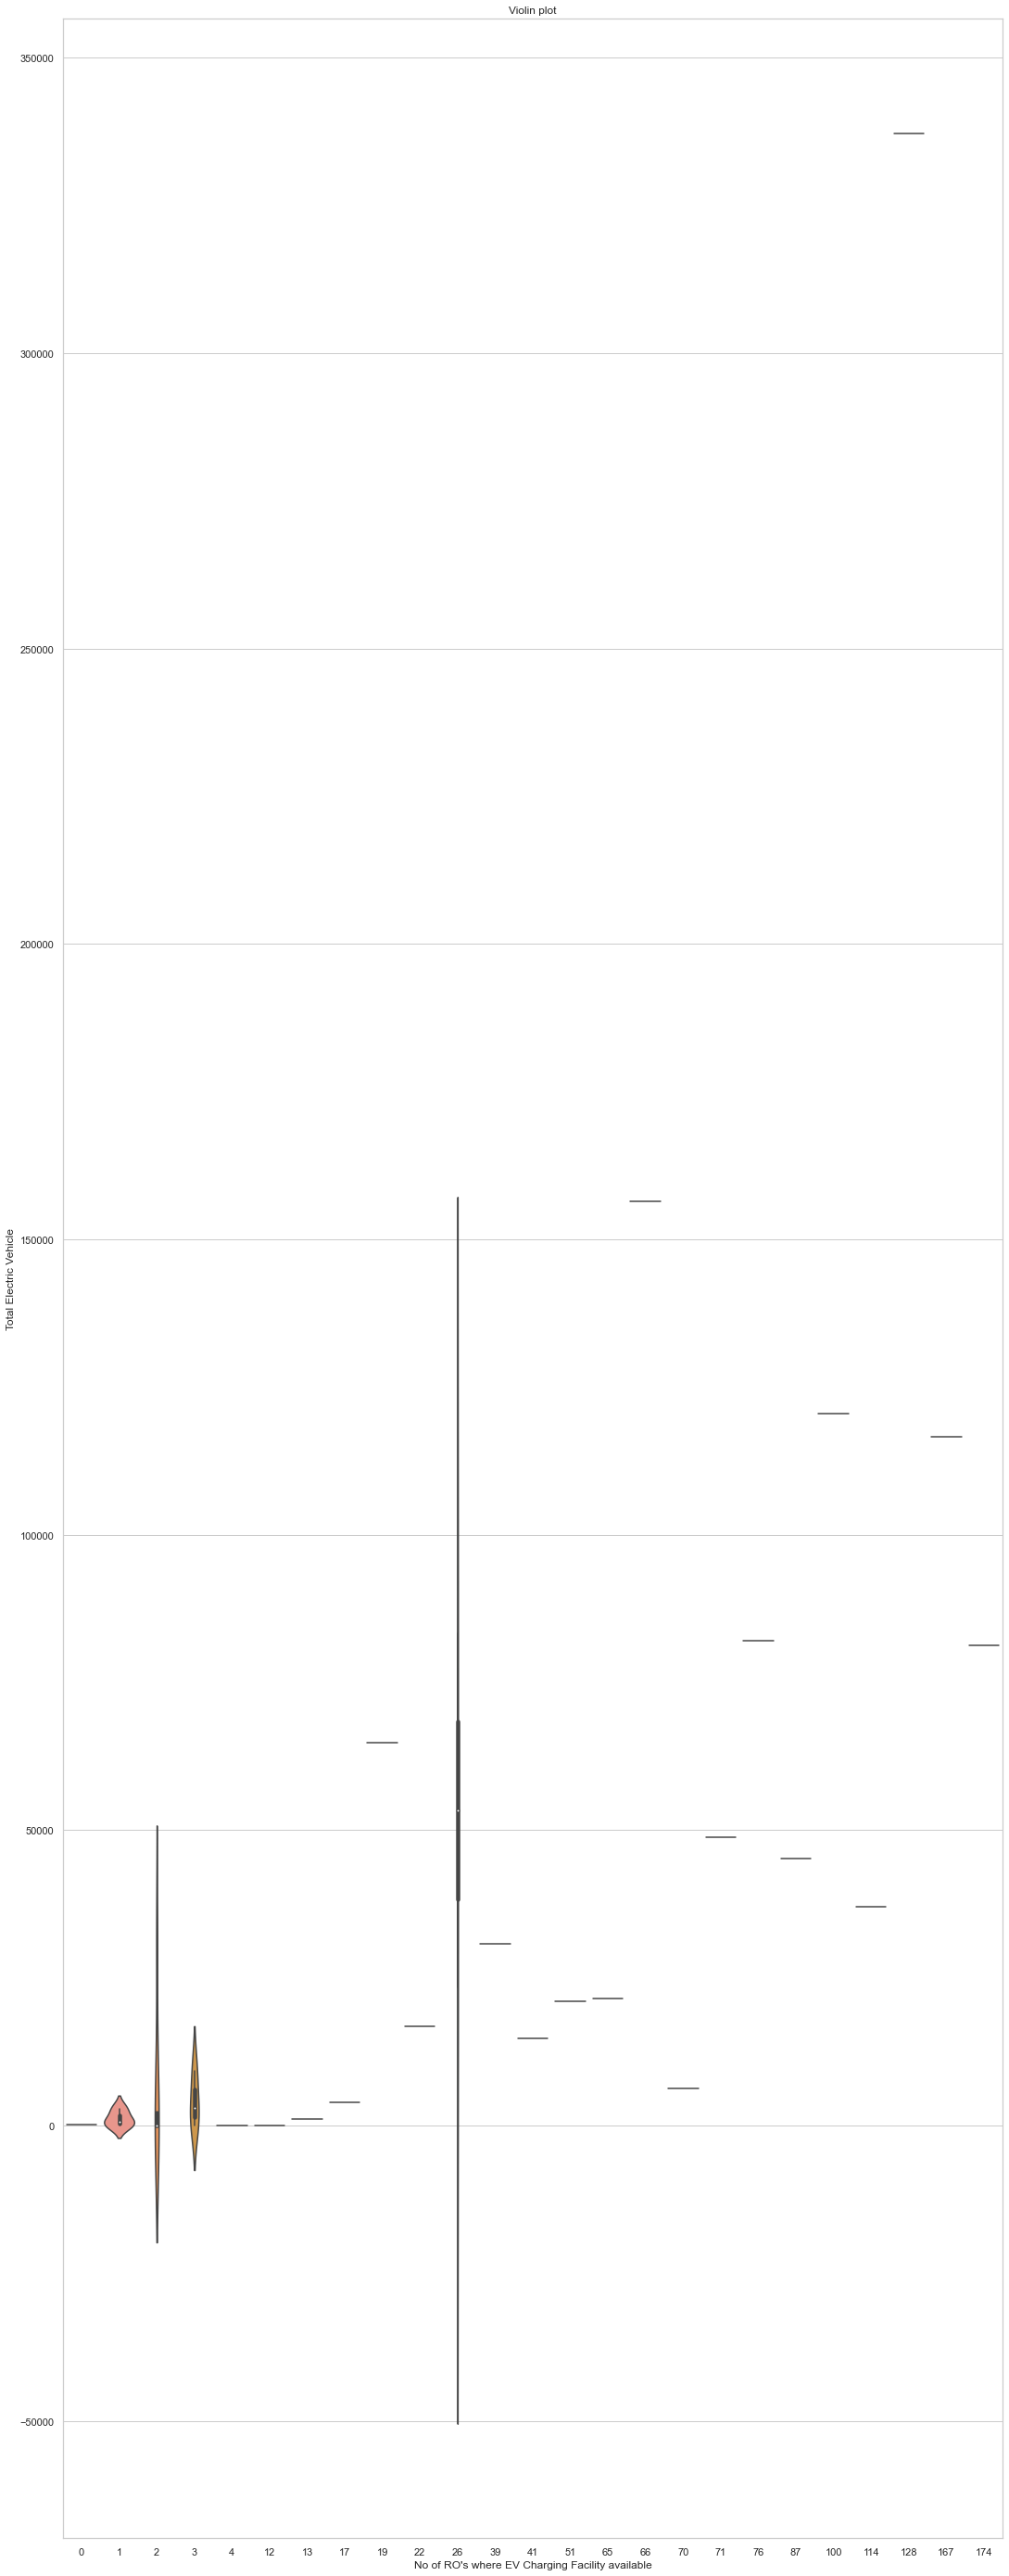

In [211]:
plt.figure(1,figsize=(100,50))

plt.subplot(1,4,1)
sns.set(style= "whitegrid")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.violinplot(x="No of RO's where EV Charging Facility available", y='Total Electric Vehicle',data= data)
plt.ylabel("Total Electric Vehicle" )
plt.title("Violin plot")
plt.show()

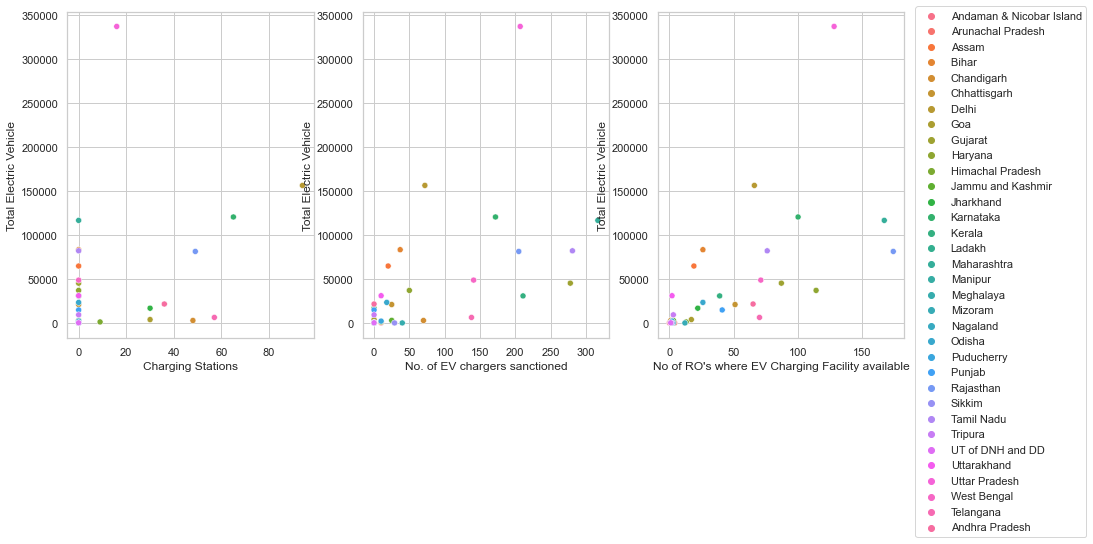

In [212]:
fig , ax = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,6))
sns.scatterplot(x='Charging Stations',y='Total Electric Vehicle',data= data , hue = "State Name",legend = False ,ax = ax[0])
sns.scatterplot(x="No. of EV chargers sanctioned", y='Total Electric Vehicle',data= data , hue = "State Name",legend = False,ax=ax[1])
sns.scatterplot(x="No of RO's where EV Charging Facility available", y='Total Electric Vehicle',data= data , hue = "State Name",ax=ax[2])
plt.legend(loc="upper left" , bbox_to_anchor=(1,1.05) , borderaxespad=1)

In [213]:
data.drop(columns=['State Name' , 'Total Non-Electric Vehicle','Total'] , axis =1 , inplace=True)


In [214]:
data.head()

,Total Electric Vehicle,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,UT of DNH and DD,Uttar Pradesh,Uttarakhand,West Bengal
0,162,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64766,0,20,19,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,83335,0,37,26,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2812,48,70,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

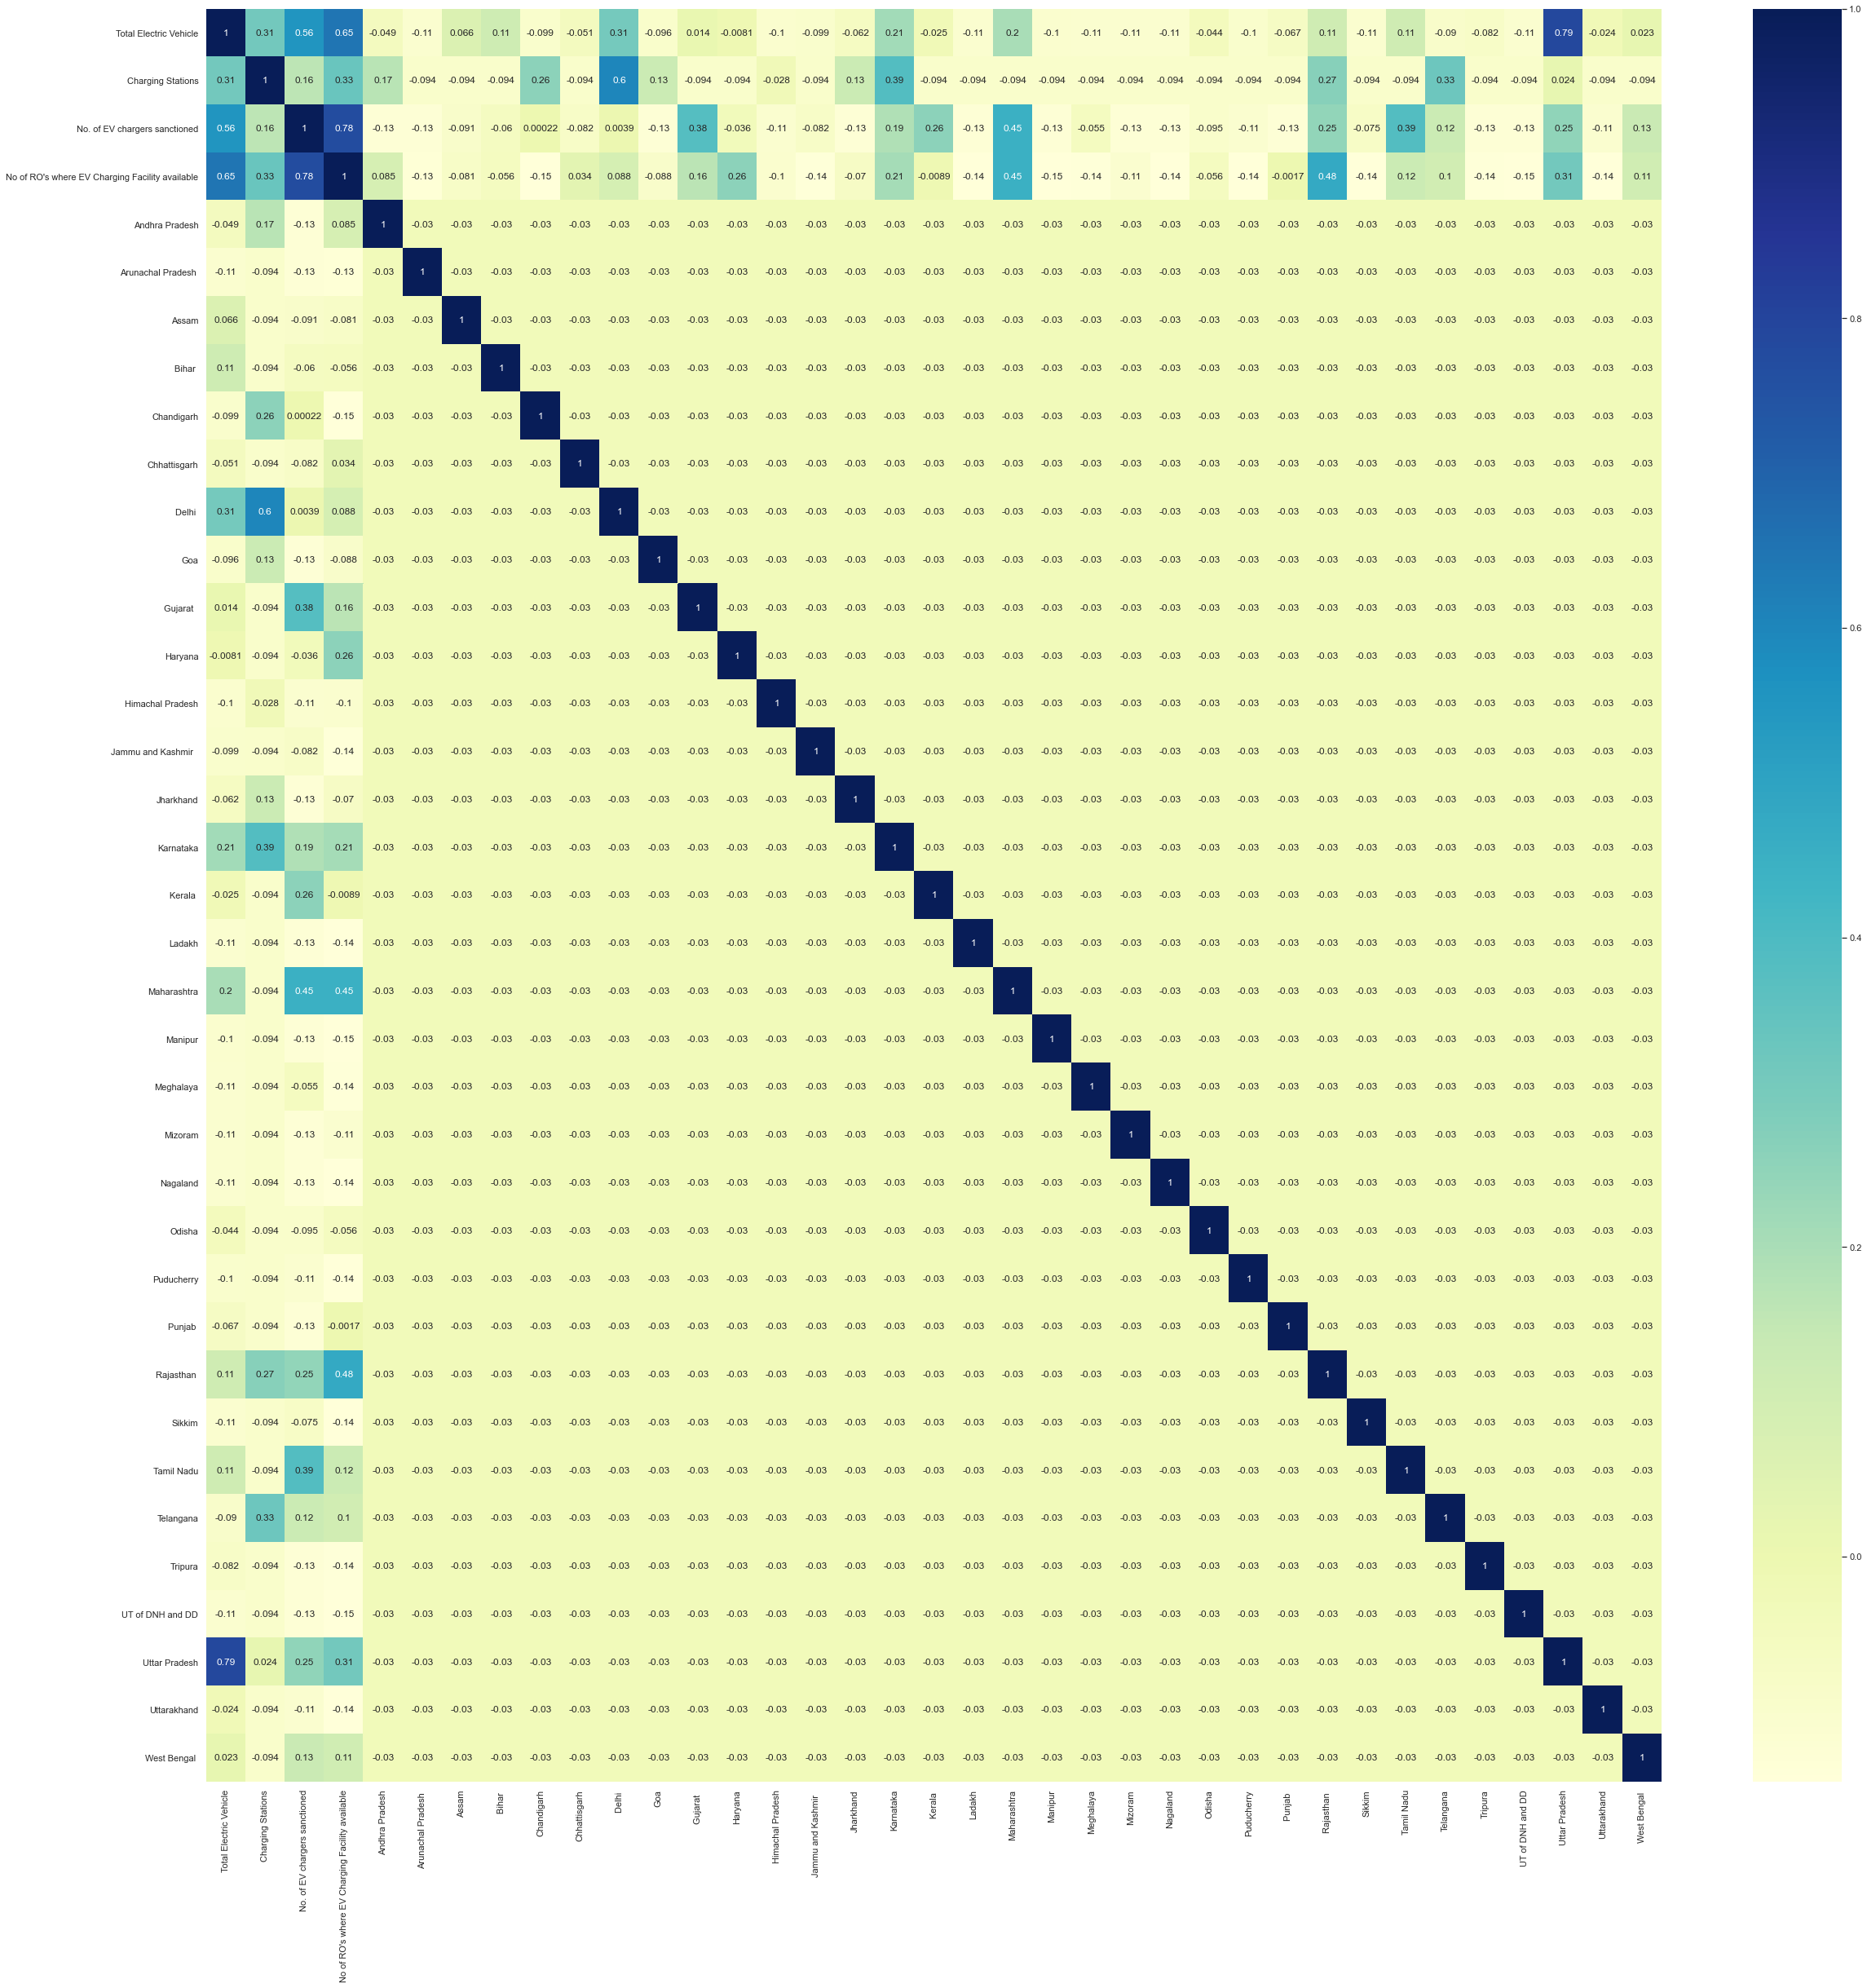

In [215]:
plt.figure(figsize=(40 , 40))
sns.heatmap(data.corr() , annot= True,cmap="YlGnBu")

In [216]:
data.corr()

,Total Electric Vehicle,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,UT of DNH and DD,Uttar Pradesh,Uttarakhand,West Bengal
Total Electric Vehicle,1.000000,0.312680,0.556612,0.647558,-0.049147,-0.106378,0.065610,0.114936,-0.098961,-0.050738,...,-0.067106,0.109631,-0.106375,0.111525,-0.089654,-0.081828,-0.105945,0.789238,-0.024063,0.023111
Charging Stations,0.312680,1.000000,0.161240,0.333654,0.171517,-0.094226,-0.094226,-0.094226,0.260098,-0.094226,...,-0.094226,0.267479,-0.094226,-0.094226,0.326533,-0.094226,-0.094226,0.023882,-0.094226,-0.094226
No. of EV chargers sanctioned,0.556612,0.161240,1.000000,0.775094,-0.127945,-0.127945,-0.091328,-0.060203,0.000215,-0.082173,...,-0.127945,0.247381,-0.074850,0.386527,0.124714,-0.127945,-0.127945,0.251043,-0.109636,0.130206
No of RO's where EV Charging Facility available,0.647558,0.333654,0.775094,1.000000,0.084649,-0.134803,-0.080839,-0.055656,-0.145595,0.034283,...,-0.001693,0.476783,-0.141998,0.124222,0.102636,-0.138400,-0.145595,0.311295,-0.141998,0.106234
Andhra Pradesh,-0.049147,0.171517,-0.127945,0.084649,1.000000,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303
Arunachal Pradesh,-0.106378,-0.094226,-0.127945,-0.134803,-0.030303,1.000000,-0.030303,-0.030303,-0.030303,-0.030303,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303
Assam,0.065610,-0.094226,-0.091328,-0.080839,-0.030303,-0.030303,1.000000,-0.030303,-0.030303,-0.030303,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303
Bihar,0.114936,-0.094226,-0.060203,-0.055656,-0.030303,-0.030303,-0.030303,1.000000,-0.030303,-0.030303,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303
Chandigarh,-0.098961,0.260098,0.000215,-0.145595,-0.030303,-0.030303,-0.030303,-0.030303,1.000000,-0.030303,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303
Chhattisgarh,-0.050738,-0.094226,-0.082173,0.034283,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,1.000000,...,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303,-0.030303


## RO's Estimation

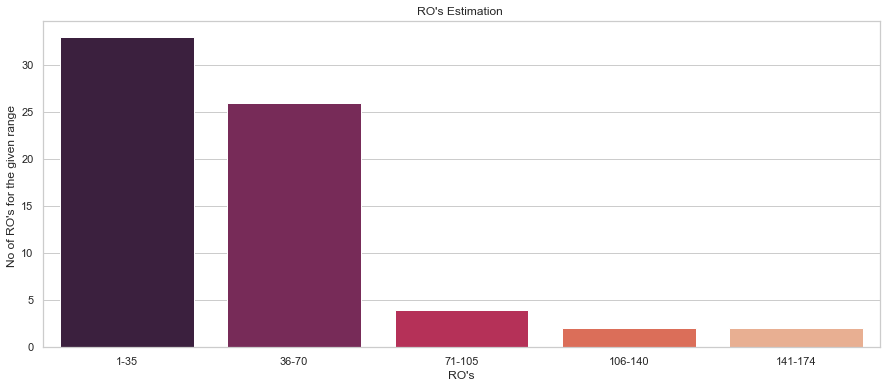

In [217]:
ro_1_35 = data["No of RO's where EV Charging Facility available"][(data["No of RO's where EV Charging Facility available"]>=1)]
ro_36_70 = data["No of RO's where EV Charging Facility available"][(data["No of RO's where EV Charging Facility available"]<= 70)]
ro_71_105 = data["No of RO's where EV Charging Facility available"][(data["No of RO's where EV Charging Facility available"]>=71)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 105)]
ro_106_140 = data["No of RO's where EV Charging Facility available"][(data["No of RO's where EV Charging Facility available"]>=106)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 140)]
ro_141_174 = data["No of RO's where EV Charging Facility available"][(data["No of RO's where EV Charging Facility available"]>=141)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 174)]

r_x = ["1-35","36-70","71-105","106-140","141-174"]
r_y = [len(ro_1_35.values),len(ro_36_70.values),len(ro_71_105.values),len(ro_106_140.values),len(ro_141_174.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=r_x , y = r_y,palette="rocket")
plt.title("RO's Estimation ")
plt.xlabel("RO's")
plt.ylabel("No of RO's for the given range ")
plt.show()

## Total Electric Sold for a particular RO's Range

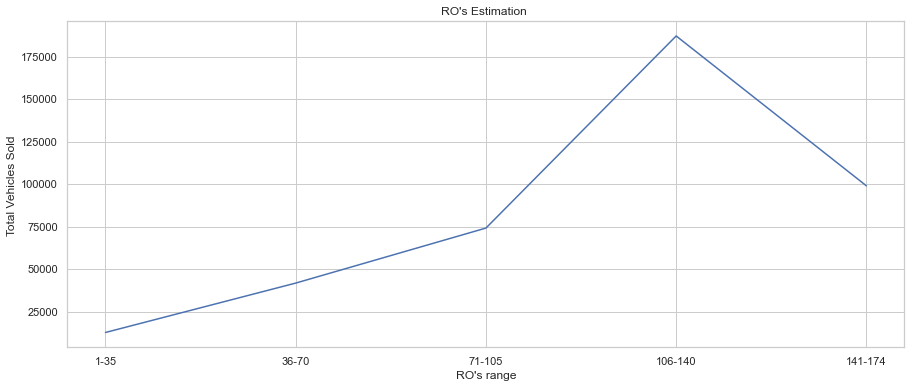

In [218]:
ro_1_35 = data["Total Electric Vehicle"][(data["No of RO's where EV Charging Facility available"]>=1)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 35) & (data["Total Electric Vehicle"]>0)]
ro_36_70 = data["Total Electric Vehicle"][(data["No of RO's where EV Charging Facility available"]>=36)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 70) & (data["Total Electric Vehicle"]>0)]
ro_71_105 = data["Total Electric Vehicle"][(data["No of RO's where EV Charging Facility available"]>=71)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 105) & (data["Total Electric Vehicle"]>0)]
ro_106_140 = data["Total Electric Vehicle"][(data["No of RO's where EV Charging Facility available"]>=106)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 140)  & (data["Total Electric Vehicle"]>0)]
ro_141_174 = data["Total Electric Vehicle"][(data["No of RO's where EV Charging Facility available"]>=141)
                                                                 & (data["No of RO's where EV Charging Facility available"]<= 174)  & (data["Total Electric Vehicle"]>0) ]


ro_1_35 = ro_1_35.mean(axis = 0)
ro_36_70 = ro_36_70.mean(axis = 0)
ro_71_105 = ro_71_105.mean(axis = 0)
ro_106_140 = ro_106_140.mean(axis = 0)
ro_141_174 = ro_141_174.mean(axis = 0)
r_x = ["1-35","36-70","71-105","106-140","141-174"]
r_y = [ro_1_35,ro_36_70,ro_71_105,ro_106_140,ro_141_174]

plt.figure(figsize=(15,6))
sns.lineplot(x=r_x , y = r_y,palette="rocket")
plt.title("RO's Estimation ")
plt.xlabel("RO's range")
plt.ylabel("Total Vehicles Sold ")
plt.show()

## Sanctioned Estimation

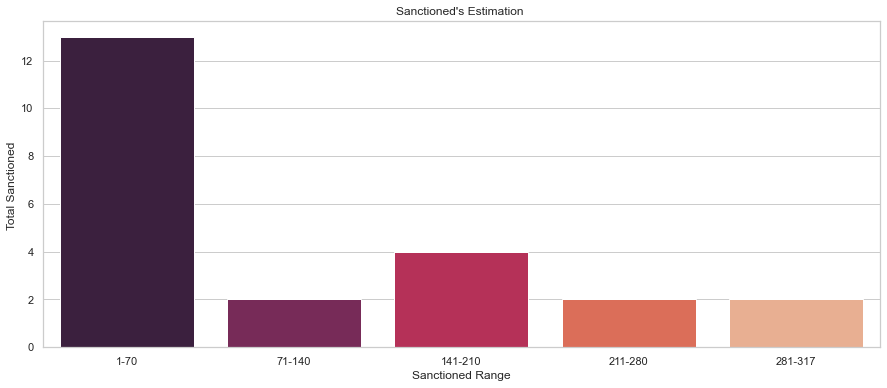

In [219]:
s_1_70 = data["No. of EV chargers sanctioned"][(data["No. of EV chargers sanctioned"]>=1)
                                                                 & (data["No. of EV chargers sanctioned"]<= 70)]
s_71_140 = data["No. of EV chargers sanctioned"][(data["No. of EV chargers sanctioned"]>=71)
                                                                 & (data["No. of EV chargers sanctioned"]<= 140)]
s_141_210 = data["No. of EV chargers sanctioned"][(data["No. of EV chargers sanctioned"]>=141)
                                                                 & (data["No. of EV chargers sanctioned"]<= 210)]
s_211_280 = data["No. of EV chargers sanctioned"][(data["No. of EV chargers sanctioned"]>=211)
                                                                 & (data["No. of EV chargers sanctioned"]<= 280)]
s_281_317 = data["No. of EV chargers sanctioned"][(data["No. of EV chargers sanctioned"]>=281)
                                                                 & (data["No. of EV chargers sanctioned"]<= 317)]
s_x = ["1-70","71-140","141-210","211-280","281-317"]
s_y = [len(s_1_70.values),len(s_71_140.values),len(s_141_210.values),len(s_211_280.values),len(s_281_317.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=s_x , y = s_y,palette="rocket")
plt.title("Sanctioned's Estimation ")
plt.xlabel("Sanctioned Range")
plt.ylabel("Total Sanctioned ")
plt.show()


### K-Means Clustering with 
                        x = (No. of EV chargers sanctioned, No of RO's where EV Charging Facility available)
                        y = (Total Electric Vehicle)

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


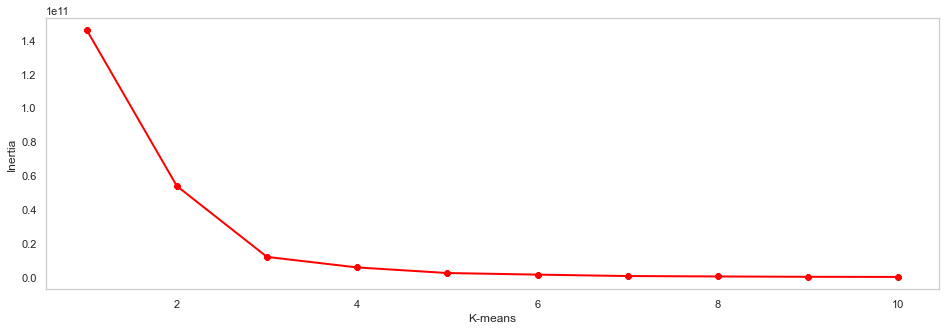

In [220]:
x1 = data.loc[:,["Total Electric Vehicle" , "No of RO's where EV Charging Facility available"]].values

from sklearn.cluster import KMeans
inertia = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init="k-means++")
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(range(1,11) , inertia , linewidth = 2, color = 'red' , marker='8')
plt.xlabel("K-means")
plt.ylabel("Inertia")
plt.show()

In [221]:
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(x1)
print(labels)

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0]


In [222]:
print(kmeans.cluster_centers_)

[[1.23086538e+04 2.51538462e+01]
 [1.00723000e+05 8.97142857e+01]
 [3.37180000e+05 1.28000000e+02]]


[]

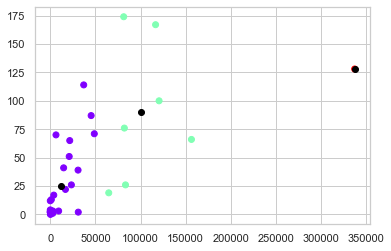

In [223]:
plt.scatter(x1[:,0] , x1[:,1] , c=labels , cmap= "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , color="black")
plt.plot()

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


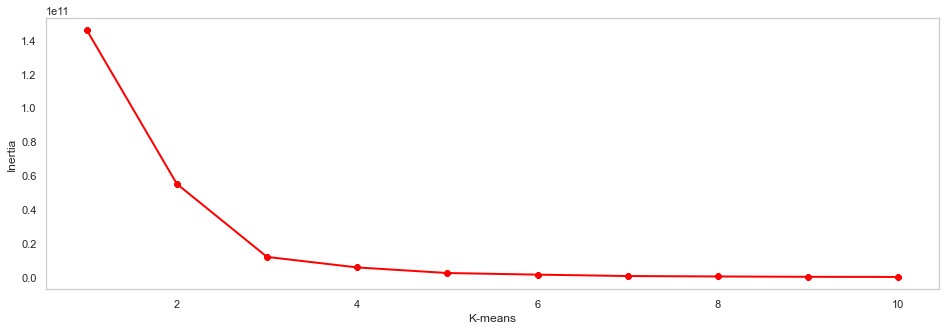

In [224]:
x2 = data.loc[: , ["Total Electric Vehicle" , "No. of EV chargers sanctioned"]].values

from sklearn.cluster import KMeans

inertia2 = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++")
    kmeans.fit(x2)
    inertia2.append(kmeans.inertia_)
    
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(range(1,11) , inertia2 , color = "red" , linewidth = 2 , marker="8" )
plt.xlabel("K-means")
plt.ylabel("Inertia")
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 3)
labels2 = kmeans.fit_predict(x2)
print(labels)

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0]


[]

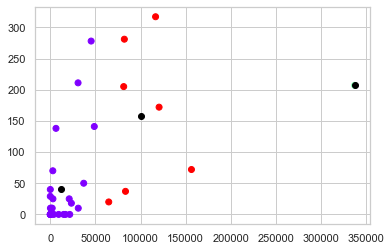

In [226]:
plt.scatter(x2[: ,0], x2[:,1] , c = labels2 , cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[:,1] , color = "black")
plt.plot()


## Finding Cluster for 

"Total Electric Vehicle" ,"No of RO's where EV Charging Facility available", "No. of EV chargers sanctioned"

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


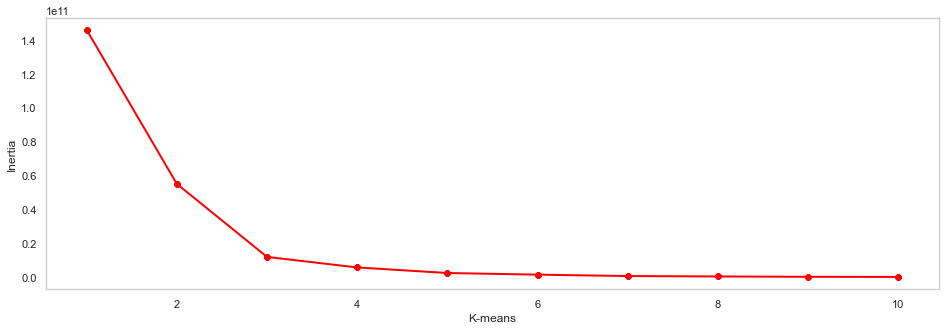

In [241]:
x3 = data.loc[: , ["Total Electric Vehicle" ,"No of RO's where EV Charging Facility available", "No. of EV chargers sanctioned"]].values

from sklearn.cluster import KMeans

inertia3 = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++")
    kmeans.fit(x3)
    inertia3.append(kmeans.inertia_)
    
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(range(1,11) , inertia3 , color = "red" , linewidth = 2 , marker="8" )
plt.xlabel("K-means")
plt.ylabel("Inertia")
plt.show()



In [242]:
kmeans = KMeans(n_clusters = 3)
labels2 = kmeans.fit_predict(x2)
print(labels)
print(kmeans.cluster_centers_)

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0]
[[1.23086538e+04 4.09615385e+01]
 [3.37180000e+05 2.07000000e+02]
 [1.00723000e+05 1.57714286e+02]]


In [243]:
clusters = kmeans.fit_predict(x3)
data["labels"] = clusters
data.head()

,Total Electric Vehicle,Charging Stations,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,UT of DNH and DD,Uttar Pradesh,Uttarakhand,West Bengal,labels
0,162,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64766,0,20,19,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,83335,0,37,26,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2812,48,70,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


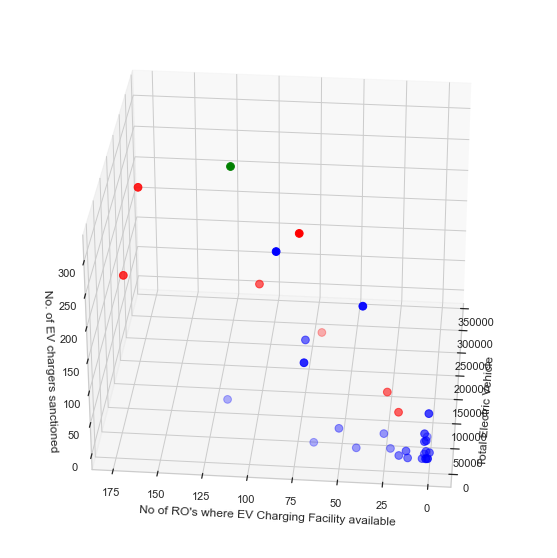

In [244]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize =(15,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(data["Total Electric Vehicle"][data.labels == 0] , data["No of RO's where EV Charging Facility available"][data.labels == 0] , data["No. of EV chargers sanctioned"][data.labels == 0] , c = "blue" , s = 60)
ax.scatter(data["Total Electric Vehicle"][data.labels == 1] , data["No of RO's where EV Charging Facility available"][data.labels == 1] , data["No. of EV chargers sanctioned"][data.labels == 1] , c = "red" , s = 60)
ax.scatter(data["Total Electric Vehicle"][data.labels == 2] , data["No of RO's where EV Charging Facility available"][data.labels == 2] , data["No. of EV chargers sanctioned"][data.labels == 2] , c = "green" , s = 60)
ax.view_init(30,185)

plt.xlabel("Total Electric Vehicle")
plt.ylabel("No of RO's where EV Charging Facility available")
ax.set_zlabel("No. of EV chargers sanctioned")
plt.show()